In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

import pandas as pd
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
img = np.load("/content/drive/MyDrive/이미지분석/images/image_array.npy")
category = np.load("/content/drive/MyDrive/이미지분석/images/category.npy")

In [4]:
img.shape, category.shape

((25474, 128, 128, 3), (25474,))

In [5]:
class_name = ['americancasual', 'casual', 'chic', 'dandy', 'formal', 'girlish', 'retro', 'romantic', 'sports', 'street']
dic = {'americancasual':0, 'casual':1, 'chic':2, 'dandy':3, 'formal':4, 'girlish':5, 'retro':6, 'romantic':7, 'sports':8, 'street':9}

In [6]:
ct = pd.get_dummies(category)
ct = ct.to_numpy()
ct

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [7]:
x_train, x_target, y_train, y_target = train_test_split(img, ct, test_size=0.25, random_state=42)

In [8]:
# 신경망 설계 CCPD CCPD (Flatten) FC D FC
cnn = Sequential()
cnn.add(Conv2D(32, (3,3), activation='relu', input_shape=(128, 128,3)))
cnn.add(Conv2D(32, (3,3), activation='relu'))
cnn.add(MaxPooling2D()) # defualt가 2라서..
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64, (3,3), activation='relu'))
cnn.add(Conv2D(64, (3,3), activation='relu'))
cnn.add(MaxPooling2D()) # defualt가 2라서..
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(512, activation='relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(10, activation='softmax'))

cnn.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
result = cnn.fit(x_train, y_train, batch_size = 128, epochs=10, validation_data=(x_target, y_target))
res = cnn.evaluate(x_target, y_target)
print(f"정확률 : {res[1] * 100}")

Epoch 1/10
150/150 [==============================] - 37s 154ms/step - loss: 13.6348 - accuracy: 0.3823 - val_loss: 1.6368 - val_accuracy: 0.4552
Epoch 2/10
150/150 [==============================] - 22s 147ms/step - loss: 1.5160 - accuracy: 0.4730 - val_loss: 1.4456 - val_accuracy: 0.4850
Epoch 3/10
150/150 [==============================] - 22s 150ms/step - loss: 1.3634 - accuracy: 0.5108 - val_loss: 1.3602 - val_accuracy: 0.5095
Epoch 4/10
150/150 [==============================] - 23s 153ms/step - loss: 1.2781 - accuracy: 0.5357 - val_loss: 1.3168 - val_accuracy: 0.5147
Epoch 5/10
150/150 [==============================] - 23s 156ms/step - loss: 1.1732 - accuracy: 0.5668 - val_loss: 1.2927 - val_accuracy: 0.5277
Epoch 6/10
150/150 [==============================] - 23s 156ms/step - loss: 1.0698 - accuracy: 0.6014 - val_loss: 1.2831 - val_accuracy: 0.5298
Epoch 7/10
150/150 [==============================] - 23s 154ms/step - loss: 0.9504 - accuracy: 0.6446 - val_loss: 1.3017 - val_a

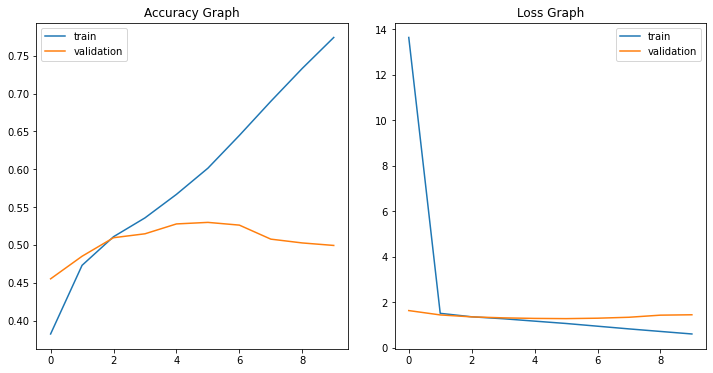

In [20]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches((12, 6))
plt.subplots_adjust(wspace = 0.15, hspace = 0.15)

axes[0].plot(result.history['accuracy'])
axes[0].plot(result.history['val_accuracy'])
axes[0].set_title("Accuracy Graph")
axes[0].legend(['train', 'validation'], loc='best')

axes[1].plot(result.history['loss'])
axes[1].plot(result.history['val_loss'])
axes[1].set_title("Loss Graph")
axes[1].legend(['train', 'validation'], loc='best')